In [6]:

from google.colab import drive
import os
import zipfile


drive.mount('/content/drive')


drive_task3 = '/content/drive/MyDrive/Task3'

print("Files in your Task3 drive folder:")
print(os.listdir(drive_task3))


zip_files = [f for f in os.listdir(drive_task3) if f.lower().endswith('.zip')]
if len(zip_files) == 0:
    raise FileNotFoundError("No .zip file found in /MyDrive/Task3. Upload the dataset zip and re-run this cell.")
else:
    zip_name = zip_files[0]
    zip_path = os.path.join(drive_task3, zip_name)
    print(f"\nFound zip: {zip_name}\nUnzipping to /content/cat_and_dog ...")

    target_dir = '/content/cat_and_dog'
    os.makedirs(target_dir, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall(target_dir)


    for root, dirs, files in os.walk(target_dir):
        print("\nTop-level folder contents at:", root)
        print("Directories:", dirs)
        print("Files (sample up to 20):", files[:20])
        break

print("\n✅ Step 1 done. If you see 'cats' and 'dogs' folders (or many images) under /content/cat_and_dog, say OK to continue.")


Mounted at /content/drive
Files in your Task3 drive folder:
['archive (7).zip']

Found zip: archive (7).zip
Unzipping to /content/cat_and_dog ...

Top-level folder contents at: /content/cat_and_dog
Directories: ['training_set', 'test_set']
Files (sample up to 20): []

✅ Step 1 done. If you see 'cats' and 'dogs' folders (or many images) under /content/cat_and_dog, say OK to continue.


In [7]:


import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [8]:
import os

path = "/content/cat_and_dog/training_set"
print("Folders inside training_set:")
print(os.listdir(path))


Folders inside training_set:
['training_set']


In [9]:
import os

path = "/content/cat_and_dog/training_set/training_set"
print("Inside second training_set folder:")
print(os.listdir(path))


Inside second training_set folder:
['cats', 'dogs']


In [10]:
import cv2
import numpy as np
from tqdm import tqdm
import os

IMG_SIZE = 64    # resizing for SVM

data = []
labels = []

base_path = "/content/cat_and_dog/training_set/training_set"

# Correct folder names
categories = ["cats", "dogs"]

for label, category in enumerate(categories):
    folder = os.path.join(base_path, category)
    print("Loading:", folder)

    for img_name in tqdm(os.listdir(folder)):
        img_path = os.path.join(folder, img_name)

        img = cv2.imread(img_path)
        if img is None:
            continue

        # resize → grayscale → flatten
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        data.append(img.flatten())   # convert to 1D array
        labels.append(label)

print("\nLoaded", len(data), "images successfully!")


Loading: /content/cat_and_dog/training_set/training_set/cats


100%|██████████| 4001/4001 [00:03<00:00, 1035.98it/s]


Loading: /content/cat_and_dog/training_set/training_set/dogs


100%|██████████| 4006/4006 [00:05<00:00, 779.05it/s]


Loaded 8005 images successfully!


In [11]:
from sklearn.model_selection import train_test_split

data = np.array(data)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (6404, 4096)
Testing data shape: (1601, 4096)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling complete!")


Scaling complete!


In [13]:
from sklearn.svm import SVC

# RBF kernel works best for image data
model = SVC(kernel='rbf', C=3, gamma='scale')

print("Training SVM model... please wait ⏳")
model.fit(X_train_scaled, y_train)
print("🎉 Training complete!")


Training SVM model... please wait ⏳
🎉 Training complete!


In [14]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_scaled)

print("🔍 Model Evaluation\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))


🔍 Model Evaluation

Accuracy: 0.6221111805121798

Classification Report:

              precision    recall  f1-score   support

         Cat       0.62      0.62      0.62       800
         Dog       0.62      0.63      0.62       801

    accuracy                           0.62      1601
   macro avg       0.62      0.62      0.62      1601
weighted avg       0.62      0.62      0.62      1601



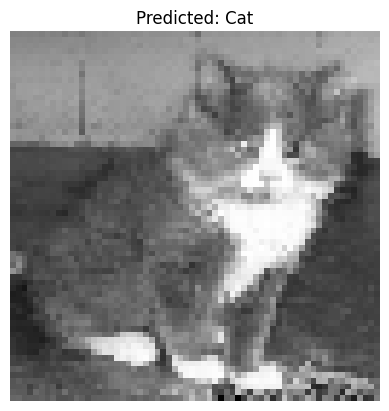

In [15]:
import matplotlib.pyplot as plt
import random

# Pick a random test image
idx = random.randint(0, len(X_test_scaled) - 1)

# Get image + prediction
img_flat = X_test[idx]
img = img_flat.reshape(64, 64)   # reshape back to 2D for display
pred = model.predict([X_test_scaled[idx]])[0]

label = "Dog" if pred == 1 else "Cat"

# Plot image
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {label}")
plt.axis('off')
plt.show()


In [16]:
import joblib

# Save model
joblib.dump(model, "svm_cat_dog_model.joblib")

# Save scaler
joblib.dump(scaler, "scaler_cat_dog.joblib")

print("✔ Model and scaler saved successfully!")


✔ Model and scaler saved successfully!


In [17]:
import joblib

# Load the trained SVM model
loaded_model = joblib.load("svm_cat_dog_model.joblib")

# Load the scaler
loaded_scaler = joblib.load("scaler_cat_dog.joblib")

print("✔ Model and scaler loaded successfully!")


✔ Model and scaler loaded successfully!


In [20]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name
    print("Image uploaded:", img_path)


Saving Golden-Retriever.webp to Golden-Retriever.webp
Image uploaded: Golden-Retriever.webp


Prediction: Dog


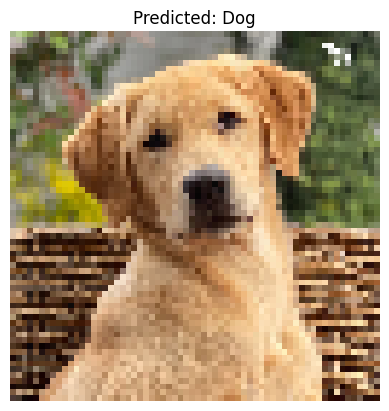

In [21]:
# Preprocess image
IMG_SIZE = 64

img = cv2.imread(img_path)

# Convert → resize → grayscale
img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

# Flatten the image
img_flat = img_gray.flatten().reshape(1, -1)

# Scale it using the saved scaler
img_scaled = loaded_scaler.transform(img_flat)

# Predict
prediction = loaded_model.predict(img_scaled)[0]

label = "Dog" if prediction == 1 else "Cat"
print("Prediction:", label)

# Show the image
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted: {label}")
plt.axis('off')
plt.show()
